In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [47]:
df=pd.read_csv("/content/Food-Truck-LineReg.csv",names=['x','y'])
df

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


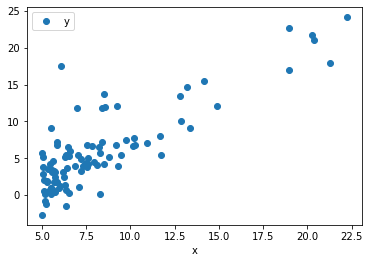

In [48]:
df.plot(x="x",y="y",style="o")

In [49]:
x_mean=df["x"].mean()
y_mean=df["y"].mean()
df["x'"]=df["x"]-x_mean
df["y'"]=df["y"]-y_mean
df["x'*y'"]=df["x'"]*df["y'"]
df["x'^2"]=df["x'"]**2
df["y'^2"]=df["y'"]**2

In [50]:
x_y_sum=df["x'*y'"].sum()
x_x_sum=df["x'^2"].sum()
y_y_sum=df["y'^2"].sum()

In [51]:
corr=x_y_sum/(x_x_sum*y_y_sum)**0.5
corr

0.8378732325263409

In [52]:
df

,x,y,x',y',x'*y',x'^2,y'^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581
...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431


In [53]:
import statistics
std_dev_x=statistics.stdev(df["x"])
std_dev_y=statistics.stdev(df["y"])
r=std_dev_y/std_dev_x
r

1.4238832294383954

In [54]:
m=corr*r
m

1.193033644189594

In [55]:
c=y_mean-m*x_mean
c

-3.8957808783118537

In [56]:
df["y_pred"]=m*df["x"]+c
df["y_pred"]

0      3.393774
1      2.698951
2      6.267196
3      4.459272
4      3.095158
        ...    
92     3.108162
93     2.433740
94     5.998524
95    12.083712
96     2.590624
Name: y_pred, Length: 97, dtype: float64

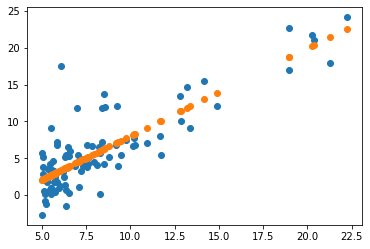

In [57]:
plot=plt.scatter(df["x"],df["y"])
plot1=plt.scatter(df["x"],df["y_pred"])

In [58]:
ssr=((df["y_pred"]-y_mean)**2).sum()
sse=((df["y_pred"]-df["y"])**2).sum()
sst=ssr+sse
print(ssr," " , sse," " ,sst)

2046.314604718041   868.5324469391845   2914.8470516572256


In [59]:
r22=ssr/sst
r22

0.7020315537841398

In [60]:
r2=corr**2
r2

0.7020315537841398